In [85]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import time

# Initialize serial communication with your device (replace 'COMx' with your actual serial port)
#ser = serial.Serial('/dev/ttyACM2', baudrate=230400)

current_upper_bound = 150
current_lower_bound = 40

In [97]:
import csv

sensor_to_test = "SPS30"

# Specify the file name for the CSV file
csv_file = f'{sensor_to_test}_current.csv'  # Make sure to use the correct file name

data = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame to verify the data has been read correctly
data.head()

len(data)
#data = data.iloc[600000:3000000]

#data.head()

# Drop the 'time_ms' column (assuming it's the first column, adjust index if needed)
#data = data.drop(columns=['Timestamp(ms)'])
# Calculate the 99.999 percentile of the 'current' column
#percentile_99999 = data['Current(uA)'].quantile(0.9999)

# Filter the data to remove outliers greater than the 99.999 percentile
#data = data[data['Current(uA)'] <= percentile_99999]

#data['Current(mA)']= data['Current(uA)']/1000

# Display the modified DataFrame
#data.head()

1129250

In [87]:
# Compute descriptive statistics
mean = np.mean(data['Current(uA)'])
median = np.median(data['Current(uA)'])
std_dev = np.std(data['Current(uA)'])
min_val = np.min(data['Current(uA)'])
max_val = np.max(data['Current(uA)'])
q1 = np.percentile(data['Current(uA)'], 25)
q3 = np.percentile(data['Current(uA)'], 75)
q9 = np.percentile(data['Current(uA)'], 99.99)

# Print the statistics
print(f"Descriptive Statistics for the {sensor_to_test} sensor current consumption:")
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum:", min_val)
print("25th Percentile (Q1):", q1)
print("75th Percentile (Q3):", q3)
print("99.999th Percentile (Q9):", q9)
print("Maximum:", max_val)

/home/willow/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/willow/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: cannot do a non-empty take from an empty axes.

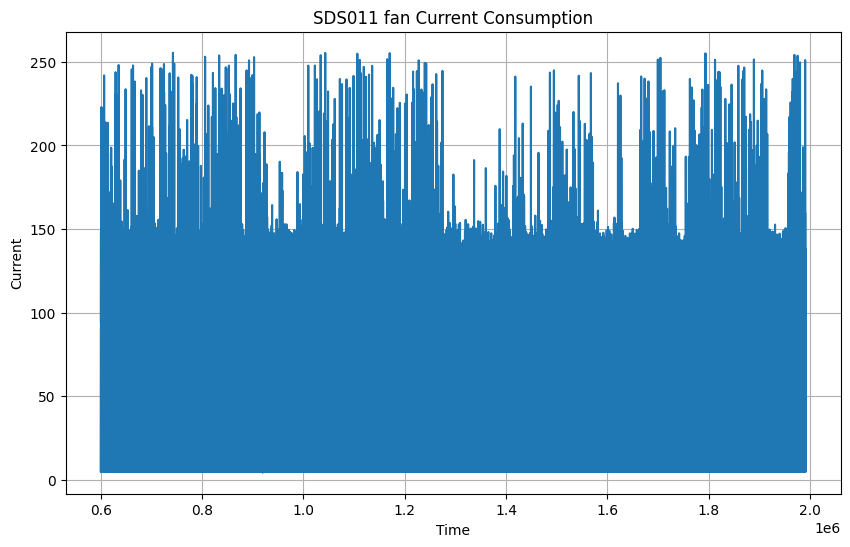

In [ ]:
# Plotting the 'current' data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(data['Current(mA)'], label='Current (mA)')  # Plot 'current' data
plt.title(f'{sensor_to_test} Current Consumption')  # Set the title of the plot
plt.xlabel('Time')  # Set the label for the x-axis
plt.ylabel('Current')  # Set the label for the y-axis
plt.grid(True)  # Show grid
plt.show()  # Show the plot

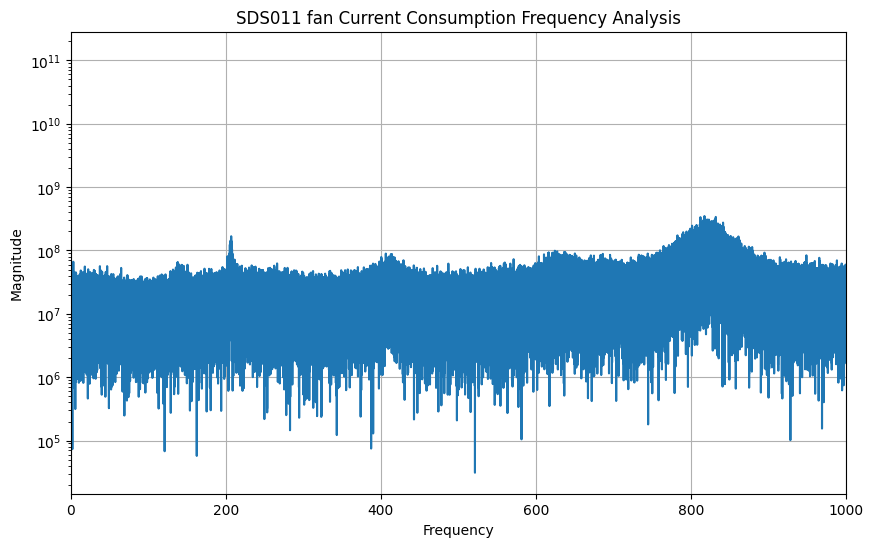

In [ ]:


# Perform Fast Fourier Transform (FFT) on the current data
# Assuming the current_data array contains your collected current data
fft_result = np.fft.fft(data['Current(uA)'])

# Calculate the frequencies corresponding to the FFT result
n = len(data['Current(uA)'])
sample_rate = 10000  # Adjust this if your data was collected at a different sampling rate
frequencies = np.fft.fftfreq(n, 1 / sample_rate)

# Find the magnitudes of the FFT result
magnitudes = np.abs(fft_result)

# Plot the frequency domain data
plt.figure(figsize=(10, 6))
plt.title(f'{sensor_to_test} Current Consumption Frequency Analysis')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.semilogy(frequencies, magnitudes)
plt.xlim(0, sample_rate / 10)  # Display the positive frequency range only (Nyquist limit)
plt.grid()

# Show the plot
plt.show()

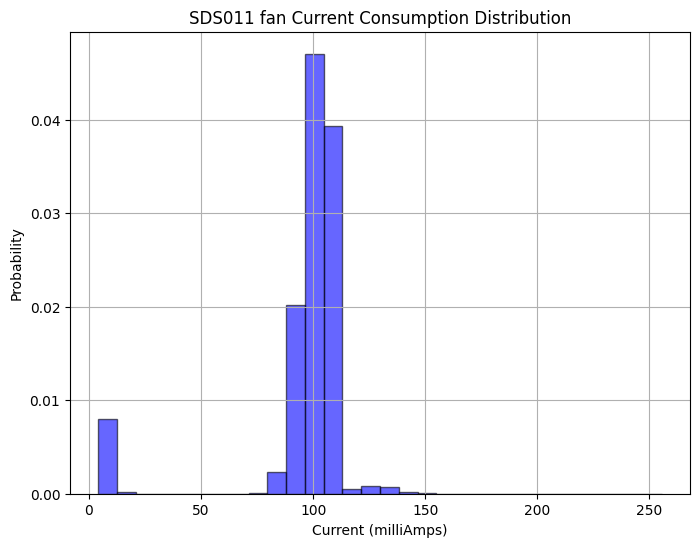

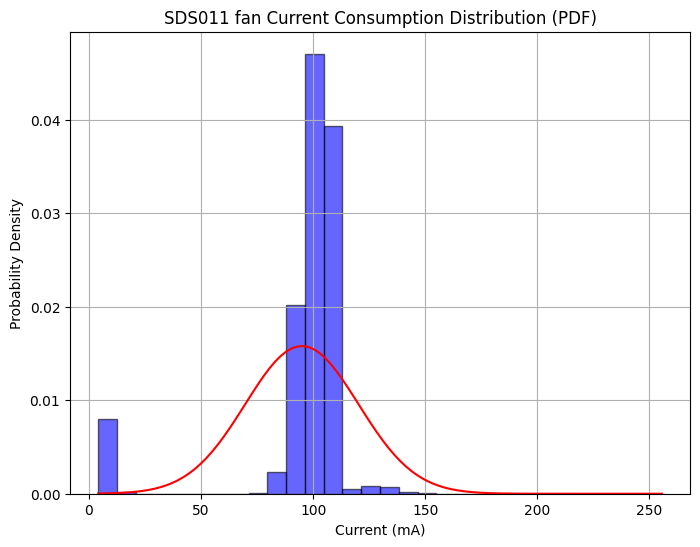

In [ ]:
import scipy.stats as stats

# Create a histogram plot
plt.figure(figsize=(8, 6))
plt.hist(data['Current(mA)'], bins=30, density=True, alpha=0.6, color='b', edgecolor='k')
plt.title(f'{sensor_to_test} Current Consumption Distribution')
plt.xlabel('Current (milliAmps)')
plt.ylabel('Probability')
plt.grid(True)

# Alternatively, create a probability density function (PDF) plot
plt.figure(figsize=(8, 6))
plt.hist(data['Current(mA)'], bins=30, density=True, alpha=0.6, color='b', edgecolor='k')
plt.plot(np.linspace(min(data['Current(mA)']), max(data['Current(mA)']), 100), 
         stats.norm.pdf(np.linspace(min(data['Current(mA)']), max(data['Current(mA)']), 100), np.mean(data['Current(mA)']), np.std(data['Current(mA)'])), 
         'r-')
plt.title(f'{sensor_to_test} Current Consumption Distribution (PDF)')
plt.xlabel('Current (mA)')
plt.ylabel('Probability Density')
plt.grid(True)

# Show the plot
plt.show()